# Investment Analysis Assignment

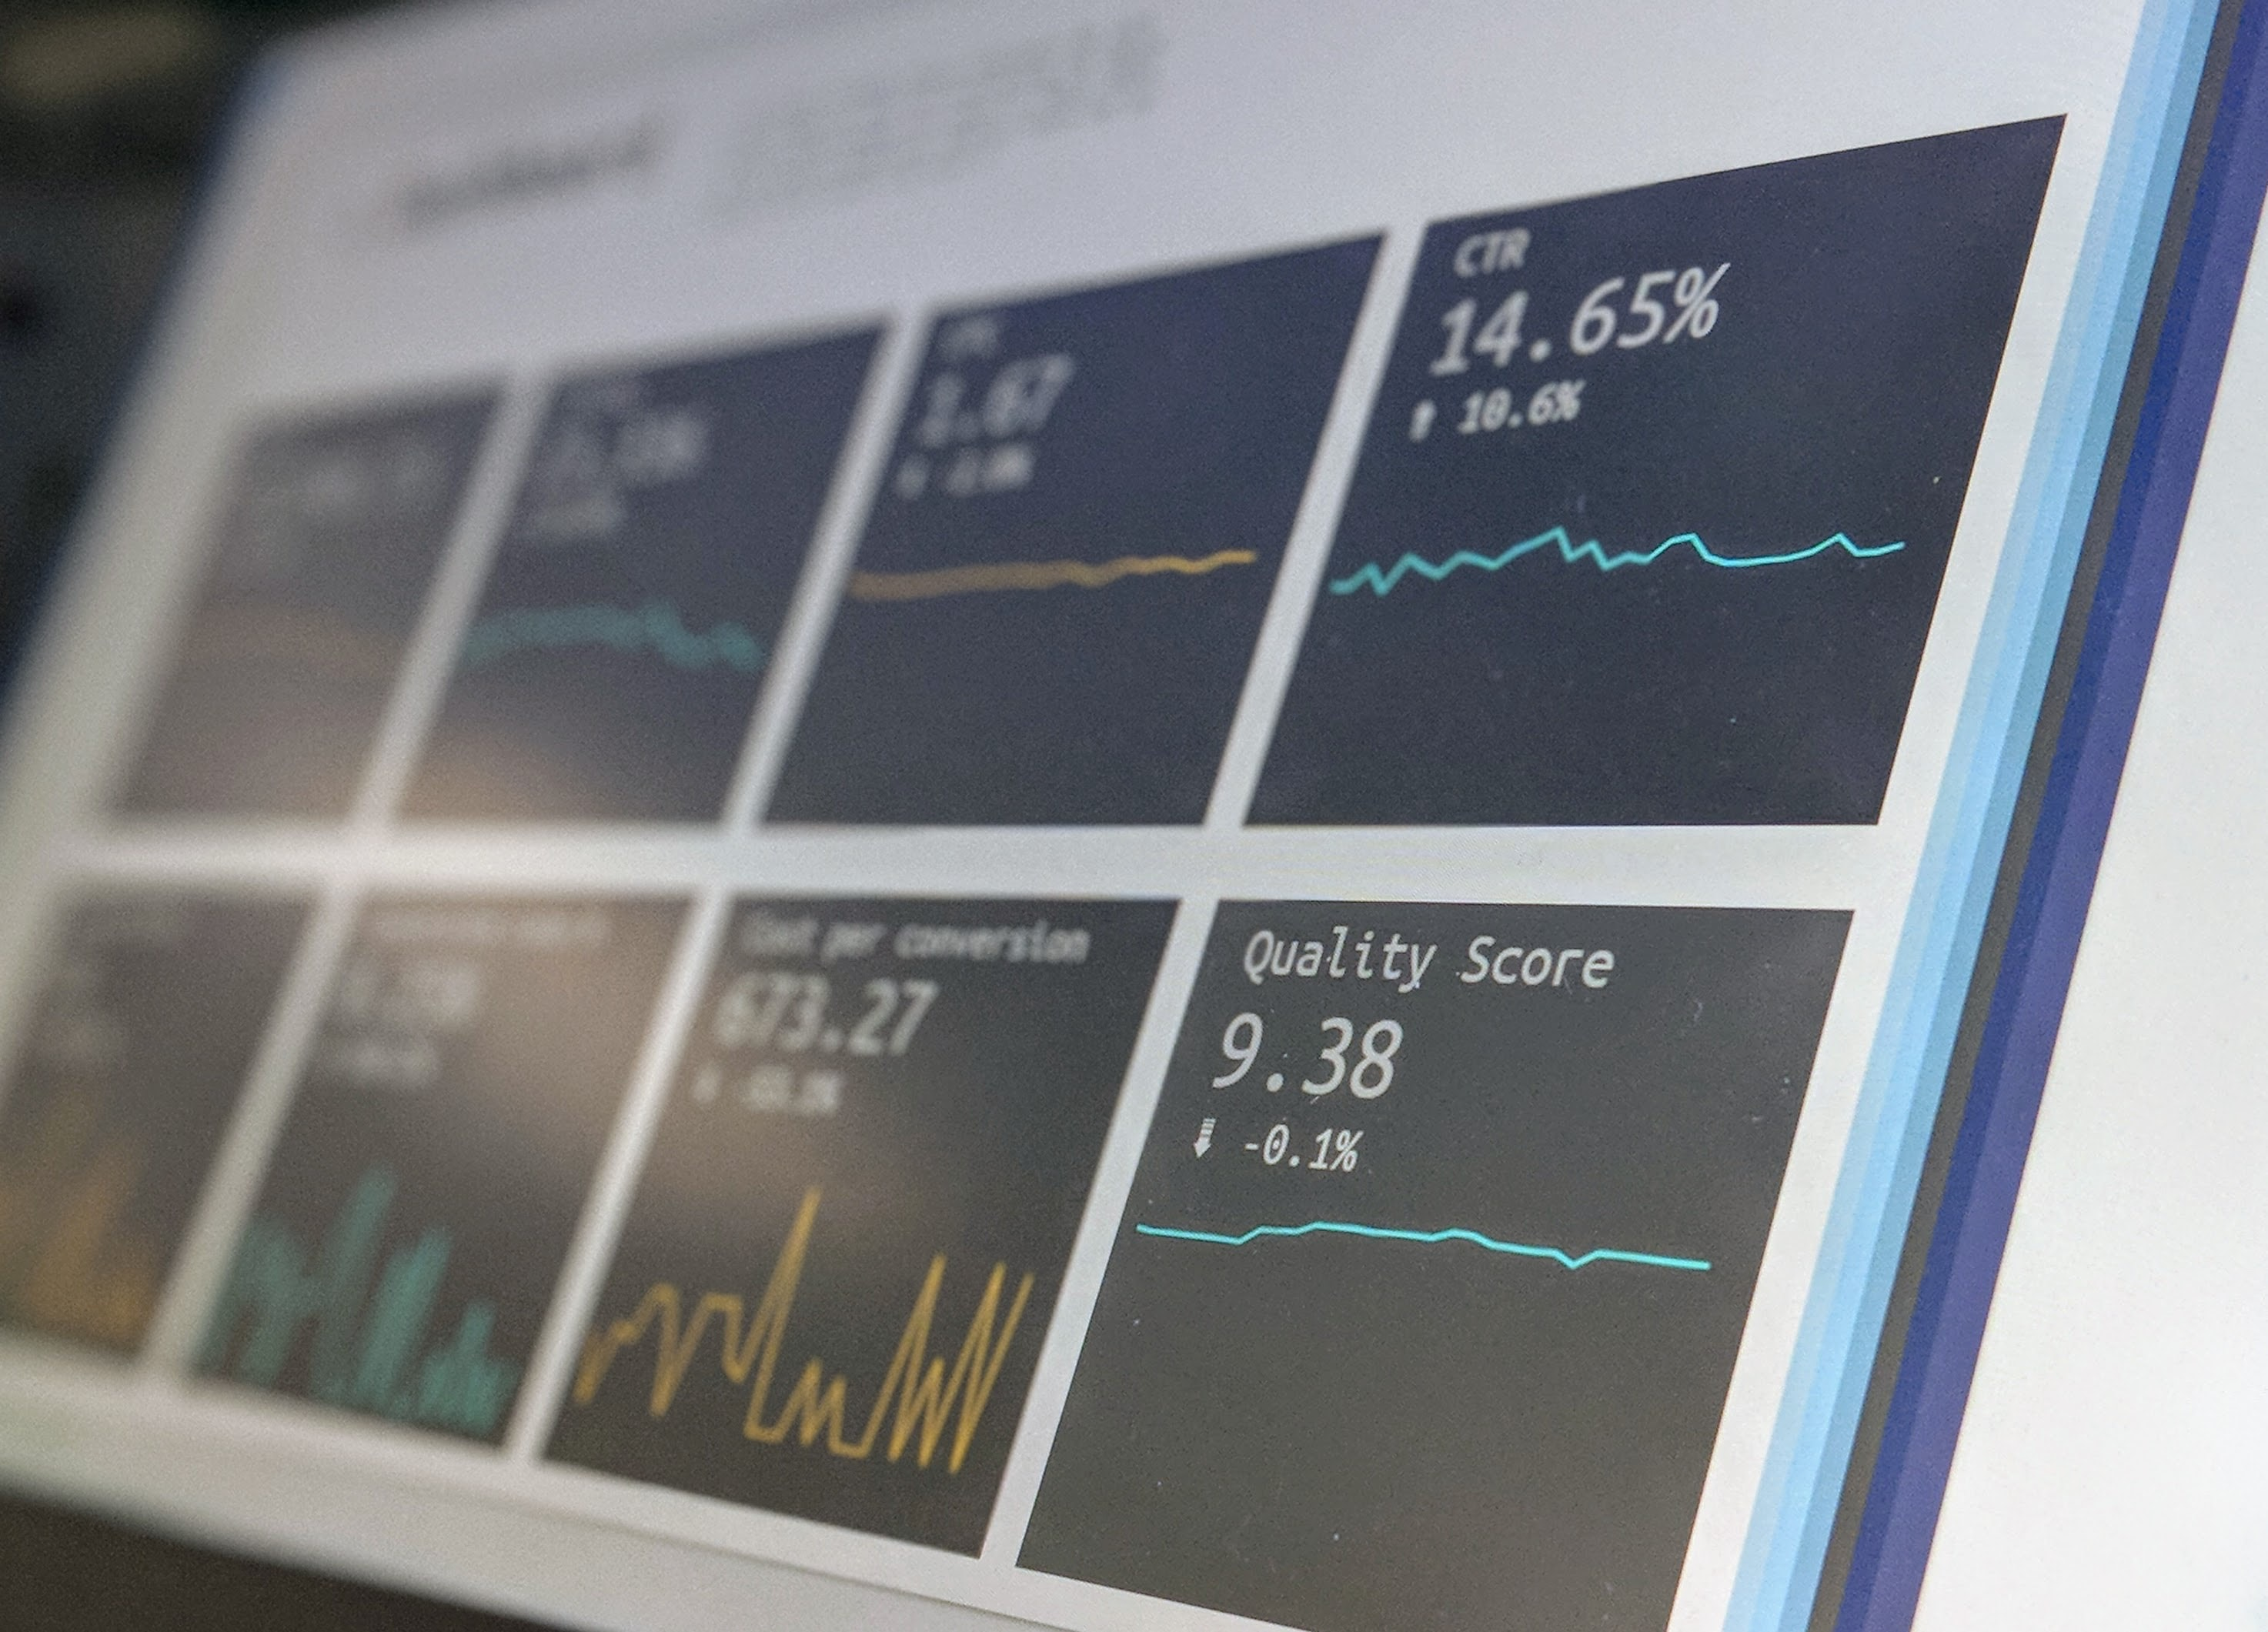

In [8]:
from IPython.display import Image
Image("D:../input/image.jpg", height = '200', width = '800')

## Business and Data Understanding

Spark Funds has two minor constraints for investments:

It wants to invest between 5 to 15 million USD per round of investment.
It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.
For our analysis, we have to consider a country to be English speaking only if English is one of the official languages in that country.

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

# CHECKPOINT - 1 : Data Cleaning

In [9]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [11]:
# Display pandas DataFrame of floats using a format string for columns   

pd.options.display.float_format = '{:20,.2f}'.format

In [12]:
# Use a function to change the permalink and company permalink into lower-case

def lowercase(val):
    return val.lower()

# We will use a method to remove the special character from the data sets

def remove_spe_chr(val):
    removeliteral=""
    for i in re.compile(r'[0-9a-zA-Z-+/.]').findall(val):
        removeliteral += str(i)
    return str(removeliteral)

Now load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [13]:
# Read the file by using the encoder

companies = pd.read_csv('D:../input/companies.txt', sep="\t", encoding = 'ISO-8859-1')
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [14]:
rounds2 = pd.read_csv('D:../input/rounds2.csv',encoding = 'ISO-8859-1')
rounds2.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [16]:
# Format the fields of a dataframe into lowercase

companies["permalink"] = companies["permalink"].apply(lowercase)
rounds2["company_permalink"] = rounds2["company_permalink"].apply(lowercase)

In [17]:
# Format the fields of a dataframe for special characters

companies["permalink"] = companies["permalink"].apply(remove_spe_chr)
rounds2["company_permalink"] = rounds2["company_permalink"].apply(remove_spe_chr)

How many unique companies are present in rounds2 ?

In [18]:
# No. of unique companies are present in rounds2

rounds2.company_permalink.nunique()

66368

How many unique companies are present in companies ?

In [19]:
# No. of unique companies are present in companies

companies.permalink.nunique()

66368

In the companies data frame, the column which can be used as the unique key for each company is

In [21]:
# Permalink

companies['permalink'].head(5)

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
4         /organization/004-technologies
Name: permalink, dtype: object

In [23]:
# Any companies in the rounds2 file which are not present in companies

val1 = pd.DataFrame(rounds2.company_permalink.unique())
val2 = pd.DataFrame(companies.permalink.unique())
val2.equals(val1)

True

In [24]:
# Answer yes or no: Y/N

if val2.equals(val1):
    print('Y')
else:
    print('N')

Y


Merging Data Frames [How many observations are present in master_frame] ?

In [25]:
# To merge the dataframes we will rename the company column name

companies.rename(columns = {'permalink':'company_permalink'}, inplace = True)

In [26]:
# Now we will merge both the dataframes together

master_frame = pd.merge(companies, rounds2, how = 'left', on = 'company_permalink')
master_frame.head(8)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,"41,250.00"
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,"43,360.00"


In [27]:
# No. of observations which are present in master_fram

observations = len(master_frame)
observations

114949

# CHECKPOINT - 2 : Funding Type Analysis

In [28]:
# Remove the NaN values from 

master_frame = master_frame[pd.notnull(master_frame['country_code'])]
master_frame = master_frame[pd.notnull(master_frame['category_list'])]
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

The value of the investment amount for each of the four funding types are

Average funding amount of Venture , Seed , Angle & Private Equity :

In [29]:
# For venture funding

venture_funding = master_frame[master_frame["funding_round_type"].isin(["venture"])]
print("Average funding amount of venture type : "+ str(venture_funding.raised_amount_usd.mean()))

Average funding amount of venture type : 11724222.690204773


In [30]:
# For seed funding

seed_funding = master_frame[master_frame["funding_round_type"].isin(["seed"])]
print("Average funding amount of seed type : "+ str(seed_funding.raised_amount_usd.mean()))

Average funding amount of seed type : 747793.6824840009


In [31]:
# For angle funding

angel_funding = master_frame[master_frame["funding_round_type"].isin(["angel"])]
print("Average funding amount of angle type : "+ str(seed_funding.raised_amount_usd.mean()))

Average funding amount of angle type : 747793.6824840009


In [32]:
# For Private Equity

private_equity_funding = master_frame[master_frame["funding_round_type"].isin(["private_equity"])]
print("Average Private Equity Funding : "+ str(private_equity_funding.raised_amount_usd.mean()))

Average Private Equity Funding : 73938486.27527472


Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, so the investment type which is more suitable for it,

In [33]:
# Group by the data as per the fund rounding type

funding_round_type = master_frame.groupby('funding_round_type').raised_amount_usd.mean().reset_index()
funding_round_type

,funding_round_type,raised_amount_usd
0,angel,"971,573.89"
1,convertible_note,"1,337,186.65"
2,debt_financing,"17,167,653.47"
3,equity_crowdfunding,"509,897.97"
4,grant,"4,512,698.29"
5,non_equity_assistance,"480,753.38"
6,post_ipo_debt,"169,451,789.77"
7,post_ipo_equity,"66,077,058.57"
8,private_equity,"73,938,486.28"
9,product_crowdfunding,"1,353,226.91"


In [34]:
# Filter the data so it only contains the chosen investment type

funding_round_type = funding_round_type.loc[(funding_round_type.raised_amount_usd >= 5000000) & (funding_round_type.raised_amount_usd <= 15000000)]
funding_round_type

,funding_round_type,raised_amount_usd
13,venture,"11,724,222.69"


# CHECKPOINT - 3 : Country Analysis

In [35]:
# The top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

venture_cc = venture_funding.groupby("country_code").raised_amount_usd.sum().reset_index()
venture_cc.sort_values(['raised_amount_usd'], axis = 0, ascending = False, inplace = True)
top9 = venture_cc.head(9)
top9

,country_code,raised_amount_usd
94,USA,"420,068,029,342.00"
15,CHN,"39,338,918,773.00"
29,GBR,"20,072,813,004.00"
39,IND,"14,261,508,718.00"
12,CAN,"9,482,217,668.00"
28,FRA,"7,226,851,352.00"
42,ISR,"6,854,350,477.00"
21,DEU,"6,306,921,981.00"
45,JPN,"3,167,647,127.00"


In [36]:
# The top three English-speaking countries in the data frame top9 are

english_country_list_codes = ['USA','AUS','CAN','IND','BMU','GBR','NZL','GIB','IRL']
top_3 = top9.loc[top9.country_code.isin(english_country_list_codes)].head(3)
top_3

,country_code,raised_amount_usd
94,USA,"420,068,029,342.00"
29,GBR,"20,072,813,004.00"
39,IND,"14,261,508,718.00"


# CHECKPOINT - 4 : Sector Analysis 1 

In [37]:
# Extracting the primary sector of each category list from the category_list column

sectors_seperator = lambda x:x.split('|')[0].title()
master_frame['primary_sector'] = master_frame.category_list.apply(sectors_seperator)

In [38]:
# Read the mapping.csv file & replace all the na & 2.na values with 0

mapping = pd.read_csv('D:../input/mapping.csv')
mapping = mapping[pd.notnull(mapping['category_list'])]
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [39]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']) 
mapping.head(8)

,category_list,variable,value
0,3D,Manufacturing,1
1,3D Printing,Manufacturing,1
2,3D Technology,Manufacturing,1
3,Accounting,Manufacturing,0
4,Active Lifestyle,Manufacturing,0
5,Ad Targeting,Manufacturing,0
6,Advanced Materials,Manufacturing,1
7,Adventure Travel,Manufacturing,0


In [40]:
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping.head(8)

,category_list,variable
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing
33,Architecture,Manufacturing
54,Batteries,Manufacturing
77,Building Products,Manufacturing


In [41]:
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing


In [42]:
# Merged data frame with each primary sector mapped to its main sector

master_frame_sector = pd.merge(master_frame, mapping, how = 'inner', on = 'category_list')
master_frame_sector.head(8)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",Media,Entertainment
1,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,"5,000,000.00",Media,Entertainment
2,/organization/anthill-magazine,Anthill Magazine,http://anthillonline.com/,Media,operating,AUS,7,Melbourne,Melbourne,23-05-2009,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,NaN,09-04-2015,"600,000.00",Media,Entertainment
3,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,"13,439,178.00",Media,Entertainment
4,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,NaN,05-08-2005,"55,464,142.00",Media,Entertainment
5,/organization/digital-news-asia,Digital News Asia,http://www.digitalnewsasia.com/,Media,operating,MYS,12,Kuala Lumpur,Petaling Jaya,01-05-2012,/funding-round/50c316d343f1100e9ac0bf06c0b9b971,seed,NaN,10-11-2014,"300,000.00",Media,Entertainment
6,/organization/genius-monkey,Genius Monkey,http://geniusmonkey.com,Media,operating,USA,AZ,Phoenix,Tempe,NaN,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,NaN,17-03-2015,"2,000,000.00",Media,Entertainment
7,/organization/glass-media,Glass Media,http://www.glass-media.com,Media,closed,USA,TX,Dallas,Dallas,01-01-2012,/funding-round/cb7074009f3bd0becbebcdf08ed63a4e,venture,NaN,01-04-2015,"30,000.00",Media,Entertainment


# CHECKPOINT - 5 : Sector Analysis 2

Create the three dataframes D1, D2 and D3

In [43]:
# For D1

D1_SA2 = master_frame_sector.loc[(master_frame_sector.country_code == "USA") & (master_frame_sector.funding_round_type == "venture") & 
                             (master_frame_sector.raised_amount_usd >= 5000000) & (master_frame_sector.raised_amount_usd <= 15000000), :]

In [44]:
# The total amount invested for each main sector in a separate column

D1_total_sum = D1_SA2.groupby("main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='total_sum_invested')

In [45]:
# The total number (or count) of investments for each main sector in a separate column

D1_total_count = D1_SA2.groupby("main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='count')

In [46]:
# Merging frames to created final D1

D1_SA2 = pd.merge(D1_SA2, D1_total_count, how='inner', on='main_sector')
D1 = pd.merge(D1_SA2, D1_total_sum, how='inner', on='main_sector')
D1.head(8)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,count,total_sum_invested
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,"5,000,000.00",Media,Entertainment,198,"1,702,119,994.00"
1,/organization/7-star-entertainment,7 Star Entertainment,http://www.7starent.com,Games,operating,USA,FL,Ft. Lauderdale,Pompano Beach,NaN,/funding-round/7db2e0412185f592d15df25f0e76c313,venture,NaN,14-07-2010,"10,000,000.00",Games,Entertainment,198,"1,702,119,994.00"
2,/organization/arroyo-video-solutions,Arroyo Video Solutions,NaN,Games,acquired,USA,CA,SF Bay Area,Pleasanton,01-01-2002,/funding-round/391c21baf280d82bb701f7c27d3d356c,venture,B,02-03-2005,"12,000,000.00",Games,Entertainment,198,"1,702,119,994.00"
3,/organization/arroyo-video-solutions,Arroyo Video Solutions,NaN,Games,acquired,USA,CA,SF Bay Area,Pleasanton,01-01-2002,/funding-round/b7d43db4f93756042a3916cf18de9aeb,venture,A,26-04-2004,"13,000,000.00",Games,Entertainment,198,"1,702,119,994.00"
4,/organization/atari,Atari,http://www.atari.com,Games,operating,USA,NY,New York City,New York,01-01-1972,/funding-round/089e5bb2bd93930c13fdde4c61940f0a,venture,NaN,15-09-2005,"7,260,000.00",Games,Entertainment,198,"1,702,119,994.00"
5,/organization/bee-cave-games,Bee Cave Games,http://www.beecavegames.com,Games,operating,USA,TX,Austin,Austin,01-01-2012,/funding-round/fa4693d9d5a7b774fef7ee4a6b193a1c,venture,A,01-06-2015,"5,500,000.00",Games,Entertainment,198,"1,702,119,994.00"
6,/organization/blade-games-world,Blade Games World,http://www.jumala.com,Games,closed,USA,WA,Seattle,Bellevue,01-02-2004,/funding-round/357e16fff772d309d5d20657db9c15a9,venture,NaN,17-04-2009,"5,426,462.00",Games,Entertainment,198,"1,702,119,994.00"
7,/organization/broadware-technologies,BroadWare Technologies,http://www.broadware.com,Games,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-1995,/funding-round/cbdf04d665b4d94dd804815ff7cf593f,venture,A,04-02-2003,"7,500,000.00",Games,Entertainment,198,"1,702,119,994.00"


In [47]:
# For D2

D2_SA2 = master_frame_sector.loc[(master_frame_sector.country_code=="GBR") & (master_frame_sector.funding_round_type=="venture") & 
                             (master_frame_sector.raised_amount_usd >=5000000) & (master_frame_sector.raised_amount_usd <= 15000000), :]

In [48]:
# The total amount invested for each main sector in a separate column

D2_total_sum = D2_SA2.groupby("main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='total_sum_invested')

In [49]:
# The total number (or count) of investments for each main sector in a separate column

D2_total_count = D2_SA2.groupby("main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='count')

In [50]:
# Merging frames to created final D2

D2_SA2 = pd.merge(D2_SA2, D2_total_count, how='inner', on='main_sector')
D2 = pd.merge(D2_SA2, D2_total_sum, how='inner', on='main_sector')
D2.head(8)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,count,total_sum_invested
0,/organization/famecount,Starcount,http://www.starcount.com/,Curated Web,operating,GBR,E2,London,Brighton,01-01-2010,/funding-round/f9e03800d455fd03294b3978c4ca84da,venture,NaN,11-11-2014,"7,464,266.00",Curated Web,"News, Search and Messaging",31,"274,140,008.00"
1,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/funding-round/20a3de0a131d495657586a2734b95adf,venture,C,13-10-2010,"7,400,000.00",Curated Web,"News, Search and Messaging",31,"274,140,008.00"
2,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/funding-round/4e220e601ed65a5d6ab04f3cb9717214,venture,A,08-05-2007,"6,000,000.00",Curated Web,"News, Search and Messaging",31,"274,140,008.00"
3,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/funding-round/cd9b496583e782dd573143b0305de1f6,venture,D,19-04-2012,"10,000,000.00",Curated Web,"News, Search and Messaging",31,"274,140,008.00"
4,/organization/naked-wines,Naked Wines,http://www.nakedwines.com,Curated Web,operating,GBR,I9,London,Norwich,01-01-2008,/funding-round/5e52e9058e28a00f13a9347d18bc7f2f,venture,C,22-08-2013,"10,000,000.00",Curated Web,"News, Search and Messaging",31,"274,140,008.00"
5,/organization/passado,Passado,NaN,Curated Web,operating,GBR,H9,London,London,01-01-2001,/funding-round/1f6f11557c657cca43e13cbbd6eb7113,venture,NaN,14-12-2006,"13,200,000.00",Curated Web,"News, Search and Messaging",31,"274,140,008.00"
6,/organization/fonestarz-media,FoneStarz Media,http://www.fonestarz.com,Mobile,acquired,GBR,C3,NaN,NaN,NaN,/funding-round/074c514c12d853dc4cc46f1730f681aa,venture,NaN,10-04-2006,"6,975,497.00",Mobile,"News, Search and Messaging",31,"274,140,008.00"
7,/organization/icera,Icera,http://www.icerasemi.com,Mobile,acquired,GBR,B7,Bristol,Bristol,01-04-2002,/funding-round/f5bfb72ce6faea78f9d92b8b62c9c0a2,venture,NaN,07-02-2003,"10,000,000.00",Mobile,"News, Search and Messaging",31,"274,140,008.00"


In [51]:
# For D3

D3_SA2 = master_frame_sector.loc[(master_frame_sector.country_code == "IND") & (master_frame_sector.funding_round_type == "venture") & 
                                  (master_frame_sector.raised_amount_usd >= 5000000) & (master_frame_sector.raised_amount_usd <= 15000000), :]

In [52]:
# The total amount invested for each main sector in a separate column

D3_total_sum = D3_SA2.groupby("main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='total_sum_invested')

In [53]:
# The total number (or count) of investments for each main sector in a separate column

D3_total_count = D3_SA2.groupby("main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='count')

In [54]:
# Merging frames to created final D3

D3_SA2 = pd.merge(D3_SA2, D3_total_count, how='inner', on='main_sector')
D3 = pd.merge(D3_SA2, D3_total_sum, how='inner', on='main_sector')
D3.head(8)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,count,total_sum_invested
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",Media,Entertainment,19,"156,150,000.00"
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,NaN,27-11-2006,"5,000,000.00",Games,Entertainment,19,"156,150,000.00"
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,A,29-03-2007,"5,000,000.00",Games,Entertainment,19,"156,150,000.00"
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,B,30-03-2011,"6,000,000.00",Games,Entertainment,19,"156,150,000.00"
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,B,03-11-2015,"5,000,000.00",Games,Entertainment,19,"156,150,000.00"
5,/organization/taggle-internet-ventures-private,Taggle Internet Ventures Private,http://www.taggle.com,Games,closed,IND,19,Bangalore,Bengaluru,01-01-2010,/funding-round/e9948bcf99cef341ba917e917bd1ec3d,venture,NaN,23-06-2010,"8,750,000.00",Games,Entertainment,19,"156,150,000.00"
6,/organization/cleartrip,Cleartrip,http://www.cleartrip.com,Travel,operating,IND,16,Mumbai,Mumbai,04-07-2006,/funding-round/9948b3e11a512230539666870fe8a6fa,venture,NaN,12-12-2006,"8,000,000.00",Travel,Entertainment,19,"156,150,000.00"
7,/organization/cleartrip,Cleartrip,http://www.cleartrip.com,Travel,operating,IND,16,Mumbai,Mumbai,04-07-2006,/funding-round/b71847894698280ebac4cadf5fc83ed4,venture,NaN,12-05-2014,"5,400,000.00",Travel,Entertainment,19,"156,150,000.00"


Sector-wise Investment Analysis

In [55]:
# 1. Total number of investments (count)

print("Total number of investments for Country1 : " + str(D1.raised_amount_usd.count()))
print("Total number of investments for Country2 : " + str(D2.raised_amount_usd.count()))
print("Total number of investments for Country3 : " + str(D3.raised_amount_usd.count()))

Total number of investments for Country1 : 6139
Total number of investments for Country2 : 342
Total number of investments for Country3 : 186


In [56]:
# 2. Total amount of investment (USD)

print("Total amount of investments for Country1 : " + str(D1.raised_amount_usd.sum()))
print("Total amount of investments for Country2 : " + str(D2.raised_amount_usd.sum()))
print("Total amount of investments for Country3 : " + str(D3.raised_amount_usd.sum()))

Total amount of investments for Country1 : 54925875312.0
Total amount of investments for Country2 : 3012928480.0
Total amount of investments for Country3 : 1629864327.0


In [57]:
#  3.Top sector (based on count of investments) for all the 3 countries

D1_total_count_investments = D1.groupby("main_sector").total_sum_invested.count().sort_values(ascending = False).to_frame(name = 'total_count')
print("Top 3 sector for Country1 :")
print(D1_total_count_investments.head(3))
Country1 = D1_total_count_investments.sum()
print(Country1)

Top 3 sector for Country1 :
                            total_count
main_sector                            
Others                             2071
Cleantech / Semiconductors         1738
Health                              601
total_count    6139
dtype: int64


In [58]:
D2_total_count_investments = D2.groupby("main_sector").total_sum_invested.count().sort_values(ascending = False).to_frame(name = 'total_count')
print("Top 3 sector for Country2 :")
print(D2_total_count_investments.head(3))
Country2 = D2_total_count_investments.sum()
print(Country2)

Top 3 sector for Country2 :
                            total_count
main_sector                            
Cleantech / Semiconductors          107
Others                              106
News, Search and Messaging           31
total_count    342
dtype: int64


In [59]:
D3_total_count_investments = D3.groupby("main_sector").total_sum_invested.count().sort_values(ascending = False).to_frame(name='total_count')
print("Top 3 sector for Country3 :")
print(D3_total_count_investments.head(3))
Country3 = D3_total_count_investments.sum()
print(Country3)

Top 3 sector for Country3 :
                                         total_count
main_sector                                         
Others                                            74
News, Search and Messaging                        31
Social, Finance, Analytics, Advertising           22
total_count    186
dtype: int64


In [60]:
print("Top 3 sector for Country1 :")
D1_total_count_investments.head(3)

Top 3 sector for Country1 :


,total_count
main_sector,
Others,2071
Cleantech / Semiconductors,1738
Health,601


In [61]:
print("Top 3 sector for Country2 :")
D2_total_count_investments.head(3)

Top 3 sector for Country2 :


,total_count
main_sector,
Cleantech / Semiconductors,107
Others,106
"News, Search and Messaging",31


In [62]:
print("Top 3 sector for Country3 :")
D3_total_count_investments.head(3)

Top 3 sector for Country3 :


,total_count
main_sector,
Others,74
"News, Search and Messaging",31
"Social, Finance, Analytics, Advertising",22


In [63]:
#  4. Second-best sector (based on count of investments)

print("Second best sector for Country1 :")
D1_total_count_investments.iloc[1:2]

Second best sector for Country1 :


,total_count
main_sector,
Cleantech / Semiconductors,1738


In [64]:
print("Second best sector for Country2 :")
D2_total_count_investments.iloc[1:2]

Second best sector for Country2 :


,total_count
main_sector,
Others,106


In [65]:
print("Second best sector for Country3 :")
D3_total_count_investments.iloc[1:2]

Second best sector for Country3 :


,total_count
main_sector,
"News, Search and Messaging",31


In [66]:
# 5. Third-best sector (based on count of investments)

print("Third best sector for Country1 :")
D1_total_count_investments.iloc[2:3]

Third best sector for Country1 :


,total_count
main_sector,
Health,601


In [67]:
print("Third best sector for Country2 :")
D2_total_count_investments.iloc[2:3]

Third best sector for Country2 :


,total_count
main_sector,
"News, Search and Messaging",31


In [68]:
print("Third best sector for Country3 :")
D3_total_count_investments.iloc[2:3]

Third best sector for Country3 :


,total_count
main_sector,
"Social, Finance, Analytics, Advertising",22


In [69]:
# 6. Number of investments in the top sector (refer to point 3)

Country1 = D1_total_count_investments.iloc[:1]
Country1

,total_count
main_sector,
Others,2071


In [70]:
Country2 = D2_total_count_investments.iloc[:1]
Country2

,total_count
main_sector,
Cleantech / Semiconductors,107


In [71]:
Country3 = D3_total_count_investments.iloc[:1]
Country3

,total_count
main_sector,
Others,74


In [72]:
# 7. Number of investments in the second-best sector (refer to point 4)

Country1 = D1_total_count_investments.iloc[1:2]
Country1

,total_count
main_sector,
Cleantech / Semiconductors,1738


In [73]:
Country2 = D2_total_count_investments.iloc[1:2]
Country2

,total_count
main_sector,
Others,106


In [74]:
Country3 = D2_total_count_investments.iloc[1:2]
Country3

,total_count
main_sector,
Others,106


In [75]:
# 8. Number of investments in the third-best sector (refer to point 5)

Country1 = D3_total_count_investments.iloc[2:3]
Country1

,total_count
main_sector,
"Social, Finance, Analytics, Advertising",22


In [76]:
Country2 = D2_total_count_investments.iloc[2:3]
Country2

,total_count
main_sector,
"News, Search and Messaging",31


In [77]:
Country3 = D3_total_count_investments.iloc[2:3]
Country3

,total_count
main_sector,
"Social, Finance, Analytics, Advertising",22


In [78]:
# 9. For the top sector count-wise (point 3), which company received the highest investment?

D1_val = D1[D1.main_sector == "Others"]
D1_val = D1_val.groupby(["company_permalink","name"]).raised_amount_usd.sum().reset_index()
D1_val.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
d1_top_list = (D1_val.iloc[0:1, 1:3].values.tolist())[0]

D2_val = D2[D2.main_sector == "Others"]
D2_val = D2_val.groupby(["company_permalink","name"]).raised_amount_usd.sum().reset_index()
D2_val.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
d2_top_list = (D2_val.iloc[0:1, 1:3].values.tolist())[0]

D3_val = D3[D3.main_sector == "Others"]
D3_val = D3_val.groupby(["company_permalink","name"]).raised_amount_usd.sum().reset_index()
D3_val.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
d3_top_list = (D3_val.iloc[0:1, 1:3].values.tolist())[0]

print(" '{0}' company recived highest investments for Country1 worth total (sum) $".format(d1_top_list[0]),d1_top_list[1])
print(" '{0}' company recived highest investments for Country2 worth total (sum) $".format(d2_top_list[0]),d2_top_list[1])
print(" '{0}' company recived highest investments for Country3 worth total (sum) $".format(d3_top_list[0]),d3_top_list[1])

 'Virtustream' company recived highest investments for Country1 worth total (sum) $ 64300000.0
 'Electric Cloud' company recived highest investments for Country2 worth total (sum) $ 37000000.0
 'FirstCry.com' company recived highest investments for Country3 worth total (sum) $ 39000000.0


In [79]:
# 10. For the second-best sector count-wise (point 4), which company received the highest investment?

D1_val = D1[D1.main_sector == "Social, Finance, Analytics, Advertising"]
D1_val = D1_val.groupby(["company_permalink","name"]).raised_amount_usd.sum().reset_index()
D1_val.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
d1_top_list = (D1_val.iloc[0:1, 1:3].values.tolist())[0]

D2_val = D2[D2.main_sector == "Social, Finance, Analytics, Advertising"]
D2_val = D2_val.groupby(["company_permalink","name"]).raised_amount_usd.sum().reset_index()
D2_val.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
d2_top_list = (D2_val.iloc[0:1, 1:3].values.tolist())[0]

D3_val = D3[D3.main_sector == "Social, Finance, Analytics, Advertising"]
D3_val = D3_val.groupby(["company_permalink","name"]).raised_amount_usd.sum().reset_index()
D3_val.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
d3_top_list = (D3_val.iloc[0:1, 1:3].values.tolist())[0]

print(" '{0}' company recived highest investments for Country1 worth total (sum) $".format(d1_top_list[0]),d1_top_list[1])
print(" '{0}' company recived highest investments for Country2 worth total (sum) $".format(d2_top_list[0]),d2_top_list[1])
print(" '{0}' company recived highest investments for Country3 worth total (sum) $".format(d3_top_list[0]),d3_top_list[1])

 'FirstRain' company recived highest investments for Country1 worth total (sum) $ 58344731.0
 'Crowdcube' company recived highest investments for Country2 worth total (sum) $ 15862857.0
 'Grameen Financial Services' company recived highest investments for Country3 worth total (sum) $ 21556050.0


# CHECKPOINT - 6 : Plots

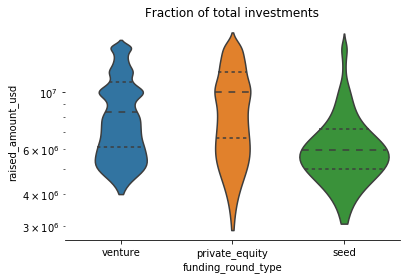

In [80]:
# A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.

plotting_frame = master_frame_sector[master_frame_sector["funding_round_type"].isin(["angle","venture","seed","private_equity"])]
plotting_frame = plotting_frame.loc[(plotting_frame.raised_amount_usd >=5000000) & (plotting_frame.raised_amount_usd <= 15000000),:]
sns.violinplot(x = 'funding_round_type', y = 'raised_amount_usd', split = True, inner = "quart", data = plotting_frame)
sns.despine(left = True)
plt.title('Fraction of total investments')
plt.yscale('log')
plt.show()

,raised_amount_usd
country_code,
USA,"420,068,029,342.00"
CHN,"39,338,918,773.00"
GBR,"20,072,813,004.00"
IND,"14,261,508,718.00"
CAN,"9,482,217,668.00"
FRA,"7,226,851,352.00"
ISR,"6,854,350,477.00"
DEU,"6,306,921,981.00"
JPN,"3,167,647,127.00"


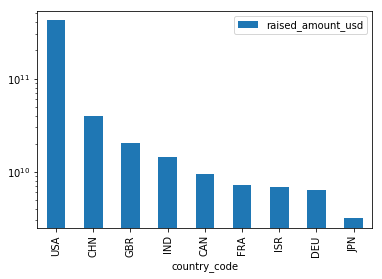

In [81]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT.

plotting = top9.set_index("country_code")
plotting.plot.bar(logy = True);
plotting

In [82]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

D1_plot = D1
D1_plot = D1_plot.groupby("main_sector").raised_amount_usd.count().reset_index()
D1_plot.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
D1_plot = D1_plot.head(3)

D2_plot = D2
D2_plot = D2_plot.groupby("main_sector").raised_amount_usd.count().reset_index()
D2_plot.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
D2_plot = D2_plot.head(3)

D3_plot = D3
D3_plot = D3_plot.groupby("main_sector").raised_amount_usd.count().reset_index()
D3_plot.sort_values(["raised_amount_usd"], axis = 0, ascending = False, inplace = True)
D3_plot = D3_plot.head(3)

In [83]:
D12 = pd.merge(D1_plot, D2_plot, how = 'outer', on = 'main_sector')
D123 = pd.merge(D12, D3_plot, how = 'outer', on = 'main_sector')

In [84]:
D123 = D123.rename(columns = {"raised_amount_usd_x": "USD", "raised_amount_usd_y": "GBR" ,"raised_amount_usd": "IND"})
D123= D123.set_index("main_sector")
D123.fillna(0)

,USD,GBR,IND
main_sector,,,
Others,"2,071.00",106.00,74.00
Cleantech / Semiconductors,"1,738.00",107.00,0.00
Health,601.00,0.00,0.00
"News, Search and Messaging",0.00,31.00,31.00
"Social, Finance, Analytics, Advertising",0.00,0.00,22.00


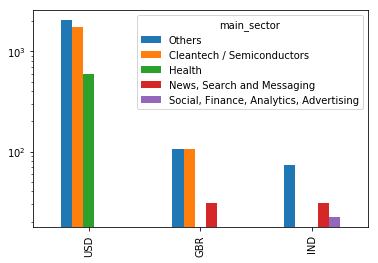

In [85]:
D123.T.plot.bar(logy = True)

# END